In [1]:
tt = .35
rho = .9
variance_scale = .1

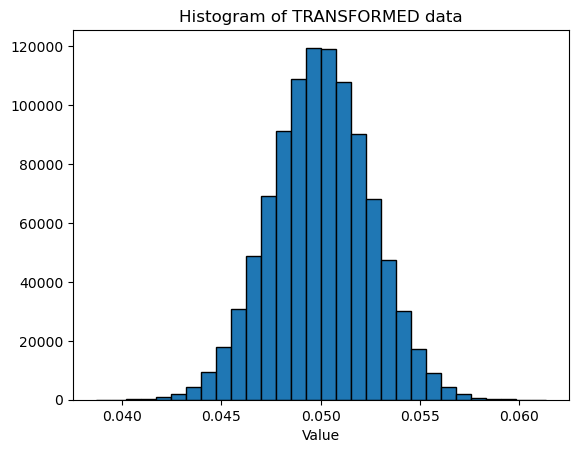

0.04999938924517761


In [2]:
import numpy as np
import matplotlib.pyplot as plt
data = np.random.randn(1000000)
data = data * variance_scale
data = variance_scale*np.exp(data) / (1 + np.exp(data))
plt.hist(data, bins=30, edgecolor='black')
# Step 3: Add title and labels
plt.title('Histogram of TRANSFORMED data')
plt.xlabel('Value')
plt.ylabel('')
plt.show()
print(np.mean(data))


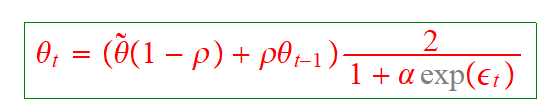

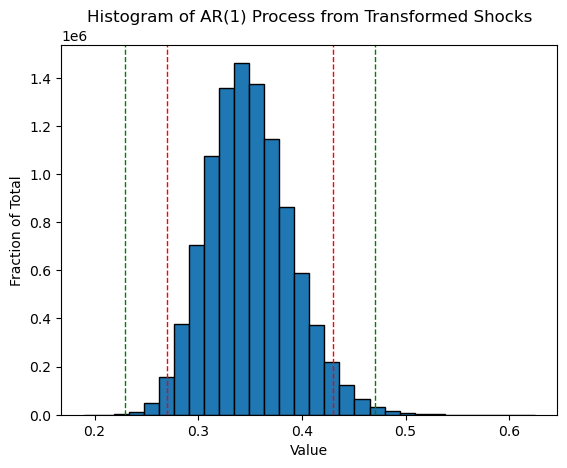

Mean: 0.34990551726270697
Variance: 0.0016164409264022388
Autocorrelation: 0.8998408964284501
Correlation with Shocks: 0.43367402772734115
Min: 0.1897118771755009
Max: 0.6247762482986124
Kurtosis: 0.2848235502980927
Range two standard deviations from mean: [0.2694955445876155, 0.43031548993779845]


In [3]:
from scipy.stats import kurtosis
import numpy as np
import matplotlib.pyplot as plt


data = np.random.randn(10000000)
data = data * variance_scale
data= 2/(1 + np.exp(data))



theta = np.zeros_like(data)
# Initialize the AR(1) process

theta[0] = (tt * (1 - rho) + tt * rho)*data[0]
# Generate the AR(1) process
for t in range(1, len(data)):
    tlc = tt * (1 - rho) + theta[t - 1] * rho
    theta[t] = tlc*data[t]

plt.hist(theta, bins=30, edgecolor='black')

mean = np.mean(theta)
std_dev = np.std(theta)

# Draw vertical lines at two standard deviations above and below the mean
plt.axvline(mean + 2 * std_dev, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean - 2 * std_dev, color='r', linestyle='dashed', linewidth=1)

# Draw vertical lines at three standard deviations above and below the mean
plt.axvline(mean + 3 * std_dev, color='g', linestyle='dashed', linewidth=1)
plt.axvline(mean - 3 * std_dev, color='g', linestyle='dashed', linewidth=1)

plt.title('Histogram of AR(1) Process from Transformed Shocks')
plt.xlabel('Value')
plt.ylabel('Fraction of Total')
plt.show()

print("Mean:", np.mean(theta))
print("Variance:", np.var(theta))
print("Autocorrelation:", np.corrcoef(theta[:-1], theta[1:])[0, 1])
print("Correlation with Shocks:", np.corrcoef(theta, data)[0, 1])
print("Min:", np.min(theta))
print("Max:", np.max(theta))
print("Kurtosis:", kurtosis(theta))

range_lower = mean - 2 * std_dev
range_upper = mean + 2 * std_dev
print("Range two standard deviations from mean: [{}, {}]".format(range_lower, range_upper))


$$
x \sim \mathcal{N}(0, 1)
$$